In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 한글 폰트를 사용하기 위한 코드
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumGothic')

In [2]:
# data 가져오기
df = pd.read_csv('./t_data.csv')
# 결측값 확인
print(df.isnull().sum())
df

년도         0
날짜         0
승패         0
상대         0
AVG_K      0
OPS_K      0
LI_K       0
WPA_K      0
HR/AB_K    0
SO/AB_K    0
ERA_K      0
WHIP_K     0
LI_K.1     0
WPA_K.1    0
SO/IP_K    0
AVG_R      0
OPS_R      0
LI_R       0
WPA_R      0
HR/AB_R    0
SO/AB_R    0
ERA_R      0
WHIP_R     0
LI_R.1     0
WPA_R.1    0
SO/IP_R    0
dtype: int64


,년도,날짜,승패,상대,AVG_K,OPS_K,LI_K,WPA_K,HR/AB_K,SO/AB_K,...,OPS_R,LI_R,WPA_R,HR/AB_R,SO/AB_R,ERA_R,WHIP_R,LI_R.1,WPA_R.1,SO/IP_R
0,2018,3월 24일,0,kt,0.333,0.779,1.75,-0.225,0.000,0.222,...,0.883,1.01,0.275,0.081,0.243,4.00,1.56,1.7,0.225,0.889
1,2018,3월 25일,1,kt,0.410,1.224,0.24,0.395,0.103,0.205,...,0.545,0.23,-0.105,0.030,0.242,15.75,2.38,0.2,-0.395,1.000
2,2018,3월 27일,1,삼성,0.389,1.494,0.30,0.282,0.167,0.278,...,0.454,0.32,-0.218,0.000,0.156,19.13,2.88,0.3,-0.282,1.250
3,2018,3월 28일,0,삼성,0.156,0.479,0.89,-0.386,0.000,0.156,...,0.826,0.60,0.114,0.026,0.179,0.00,0.78,0.9,0.386,0.556
4,2018,3월 29일,1,삼성,0.394,1.080,0.61,0.147,0.061,0.212,...,0.372,0.84,-0.353,0.000,0.321,7.88,2.13,0.6,-0.147,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2021,10월 24일,0,NC,0.194,0.411,1.28,-0.361,0.000,0.333,...,0.698,1.20,0.139,0.032,0.323,1.00,0.89,1.3,0.361,1.333
550,2021,10월 27일,1,롯데,0.286,0.718,1.26,0.059,0.000,0.200,...,0.452,1.20,-0.441,0.032,0.161,3.00,1.56,1.3,-0.059,0.778
551,2021,10월 28일,1,롯데,0.188,0.559,0.96,0.222,0.031,0.219,...,0.754,1.38,-0.278,0.057,0.171,5.00,1.11,1.0,-0.222,0.778
552,2021,10월 29일,0,두산,0.286,0.833,0.81,-0.040,0.029,0.314,...,0.892,0.42,0.460,0.049,0.098,5.00,1.89,0.8,0.040,1.222


In [3]:
# 필요없는 특징 제거 (WPA, LI도 다 제외했음)
df_1 = df.drop(['년도', '날짜', '상대', 'WPA_K', 'WPA_K.1', 'LI_K', 'LI_K.1', 'LI_R', 'LI_R.1', 'WPA_R', 'WPA_R.1'], axis=1)
df_1

,승패,AVG_K,OPS_K,HR/AB_K,SO/AB_K,ERA_K,WHIP_K,SO/IP_K,AVG_R,OPS_R,HR/AB_R,SO/AB_R,ERA_R,WHIP_R,SO/IP_R
0,0,0.333,0.779,0.000,0.222,5.00,1.33,1.000,0.297,0.883,0.081,0.243,4.00,1.56,0.889
1,1,0.410,1.224,0.103,0.205,1.00,0.78,0.889,0.212,0.545,0.030,0.242,15.75,2.38,1.000
2,1,0.389,1.494,0.167,0.278,0.00,0.89,0.556,0.188,0.454,0.000,0.156,19.13,2.88,1.250
3,0,0.156,0.479,0.000,0.156,6.00,1.78,0.778,0.359,0.826,0.026,0.179,0.00,0.78,0.556
4,1,0.394,1.080,0.061,0.212,0.00,1.00,1.000,0.107,0.372,0.000,0.321,7.88,2.13,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0,0.194,0.411,0.000,0.333,3.38,1.38,1.250,0.258,0.698,0.032,0.323,1.00,0.89,1.333
550,1,0.286,0.718,0.000,0.200,2.00,0.56,0.556,0.161,0.452,0.032,0.161,3.00,1.56,0.778
551,1,0.188,0.559,0.031,0.219,3.00,1.33,0.667,0.257,0.754,0.057,0.171,5.00,1.11,0.778
552,0,0.286,0.833,0.029,0.314,8.00,2.11,0.444,0.317,0.892,0.049,0.098,5.00,1.89,1.222


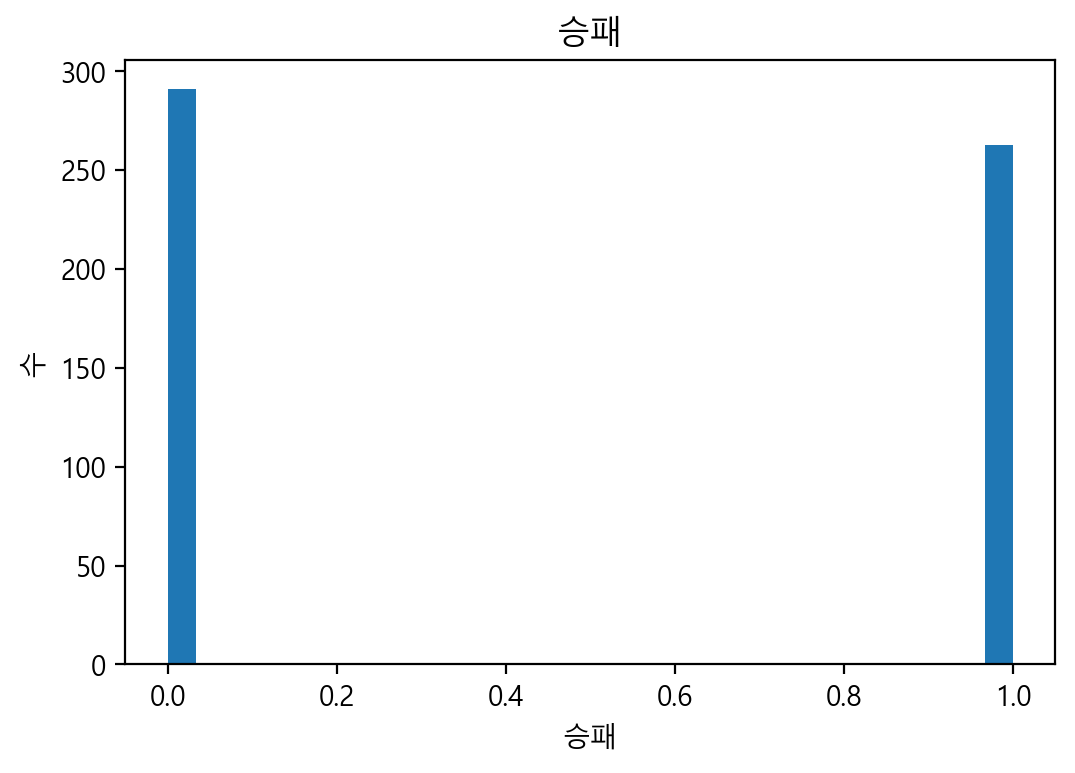

In [4]:
plt.figure(dpi=200)
plt.title("승패")
plt.xlabel('승패')
plt.ylabel('수')
plt.hist(df_1['승패'], bins=30)
plt.show()

In [5]:
# r- square
df_test = df_1.drop(['승패'], axis=1)
lm = sm.OLS(df_1['승패'], df_test)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     승패   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              147.8
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                   2.90e-174
Time:                        16:28:29   Log-Likelihood:                         -143.41
No. Observations:                 554   AIC:                                      314.8
Df Residuals:                     540   BIC:                                      375.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AVG_K         -0.7454      0.620     -1.203      0.229      -1.962       0.472
OPS_K          0.7599      0.323      2.350      0.019       0.125       1.395
HR/AB_K       -1.8006      1.029     -1.750      0.081      -3.822       0.221
SO/AB_K        0.1847      1.045      0.177      0.860      -1.867       2.237
ERA_K         -0.0543      0.007     -7.697      0.000      -0.068      -0.040
WHIP_K        -0.0089      0.060     -0.149      0.882      -0.126       0.108
SO/IP_K       -0.7308      0.220     -3.315      0.001      -1.164      -0.298
AVG_R          0.7335      0.469      1.564      0.118      -0.188       1.655
OPS_R         -0.1748      0.199     -0.877      0.381      -0.566       0.217
HR/AB_R       -0.3014      0.465     -0.649      0.517      -1.214       0.611
SO/AB_R        3.4517      0.834      4.137      0.000       1.813       5.091
ERA_R          0.0457      0.008      5.944      0.000       0.031       0.061
WHIP_R         0.0313      0.073      0.429      0.668      -0.112       0.175
SO/IP_R       -0.0435      0.276     -0.158      0.875      -0.586       0.499
==============================================================================
Omnibus:                       23.236   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.379
Skew:                           0.035   Prob(JB):                      0.00557
Kurtosis:                       2.333   Cond. No.                         780.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#data, label 나누기
df_train = df_1.drop(['승패'], axis = 1) 
df_label = df_1.loc[:, ['승패']]

In [7]:
# 잘 나눠졌는지 확인
df_train

,AVG_K,OPS_K,HR/AB_K,SO/AB_K,ERA_K,WHIP_K,SO/IP_K,AVG_R,OPS_R,HR/AB_R,SO/AB_R,ERA_R,WHIP_R,SO/IP_R
0,0.333,0.779,0.000,0.222,5.00,1.33,1.000,0.297,0.883,0.081,0.243,4.00,1.56,0.889
1,0.410,1.224,0.103,0.205,1.00,0.78,0.889,0.212,0.545,0.030,0.242,15.75,2.38,1.000
2,0.389,1.494,0.167,0.278,0.00,0.89,0.556,0.188,0.454,0.000,0.156,19.13,2.88,1.250
3,0.156,0.479,0.000,0.156,6.00,1.78,0.778,0.359,0.826,0.026,0.179,0.00,0.78,0.556
4,0.394,1.080,0.061,0.212,0.00,1.00,1.000,0.107,0.372,0.000,0.321,7.88,2.13,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.194,0.411,0.000,0.333,3.38,1.38,1.250,0.258,0.698,0.032,0.323,1.00,0.89,1.333
550,0.286,0.718,0.000,0.200,2.00,0.56,0.556,0.161,0.452,0.032,0.161,3.00,1.56,0.778
551,0.188,0.559,0.031,0.219,3.00,1.33,0.667,0.257,0.754,0.057,0.171,5.00,1.11,0.778
552,0.286,0.833,0.029,0.314,8.00,2.11,0.444,0.317,0.892,0.049,0.098,5.00,1.89,1.222


In [8]:
df_label

,승패
0,0
1,1
2,1
3,0
4,1
...,...
549,0
550,1
551,1
552,0


In [9]:
# dataFrame -> numpy
df_res = df_train.values
df_label = df_label.values

In [10]:
print(df_res.shape)
print(df_label.shape)

(554, 14)
(554, 1)


In [11]:
# train, test data 분리 (8 : 2)
x_train, x_test, y_train, y_test = train_test_split(df_res, df_label, test_size=0.2, shuffle=False)

In [12]:
# gboost 활용
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

In [13]:
gb.fit(x_train, y_train)

C:\Miniconda\envs\chonnam\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [14]:
gb_pred = gb.predict(x_test)

In [15]:
gb_pred

array([ 0.85295622, -0.21518236,  0.82052608,  0.97201525, -0.06451832,
        0.70283887,  0.70978601,  0.97395246,  0.97375836, -0.02343164,
       -0.05937302, -0.00685929,  0.96643259,  0.04932059, -0.02607335,
        0.06100585,  0.99733017,  1.01028387,  0.00838905,  0.00461485,
       -0.02570214, -0.0188271 ,  0.02055421,  0.07774247,  1.01174354,
       -0.05226949,  0.48991017,  0.86521756,  0.56319479,  0.05597584,
        0.20526312, -0.02304744,  0.67891058,  0.77451131, -0.01407315,
       -0.03823391, -0.01682222,  0.7917659 , -0.05584421,  0.68830635,
       -0.00842937,  0.06506227, -0.02680521, -0.04946611, -0.05843594,
        0.21656307,  0.59273559,  0.11599303, -0.02220294, -0.03044168,
        0.14204294,  0.05669222,  1.01173512,  1.02249876,  0.93456167,
        0.71024502,  0.98247237,  1.00893652,  0.40621179,  1.06310963,
       -0.06034211,  0.97440132,  0.95852004,  0.00794449, -0.04204693,
        1.03176165, -0.00645221,  0.00280178,  0.88422125,  0.00

In [16]:
rmse = np.sqrt(mean_squared_error(gb_pred, y_test))

In [17]:
rmse

0.20451617085149468